In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

In [2]:
# import csv as DF
df = pd.read_csv('../data/dataframe.csv')

In [3]:
df

,listing_id,property_name,address,mean_rent,mean_area,walkscore,cost/SF
0,p9c5ygt,Dobie Twenty21 Student Spaces,"2021-2025 Guadalupe St, Austin, TX 78705",1791.500000,434.750000,95,4.120759
1,rdsyjd0,The District on La Frontera,"2811 La Frontera Blvd, Austin, TX 78728",2130.714286,926.142857,12,2.300632
2,vsvz28g,Cliffs at Barton Creek,"3050 Tamarron Blvd, Austin, TX 78746",2585.545455,1079.772727,39,2.394527
3,pfzryrs,Radius On Grove,"2301 Grove Blvd, Austin, TX 78741",1604.000000,1042.500000,34,1.538609
4,lb7xscf,Chandelier,"2336 Douglas St, Austin, TX 78741",1274.333333,697.000000,47,1.828312
...,...,...,...,...,...,...,...
484,h9z6sd3,La Frontera Square Apartments,"2601 La Frontera Blvd, Round Rock, TX 78681",1141.000000,709.866667,53,1.607344
485,l8esygf,300 Bowie St Unit 2904,"Austin, TX 78703",1995.000000,565.000000,96,3.530973
486,w4ex40j,617 Peacock Ln,"Austin, TX 78704",2950.000000,1766.000000,60,1.670442
487,6vvhrpr,6500 Adair Dr,"Austin, TX 78754",1650.000000,1636.000000,3,1.008557


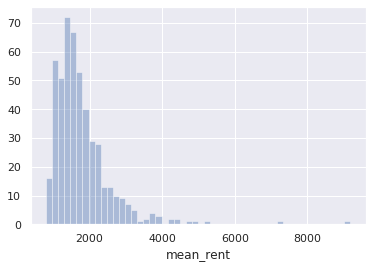

In [4]:
y = df['mean_rent']
sns.distplot(df['mean_rent'], bins=50, kde=False);

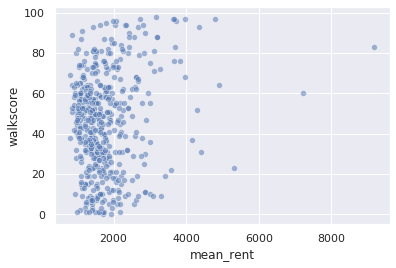

In [5]:
# scatter plot showing no correlation betwee rent and walkscore
sns.scatterplot(df['mean_rent'], df['walkscore'], alpha=.5)

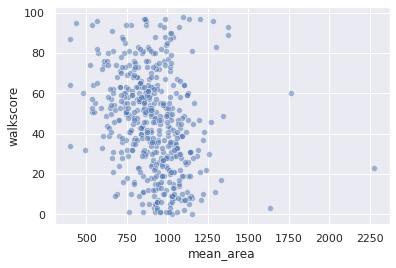

In [6]:
# scatter plot maybe showing very weak negative correlation between unit area and walkscore
sns.scatterplot(df['mean_area'], df['walkscore'], alpha=.5)

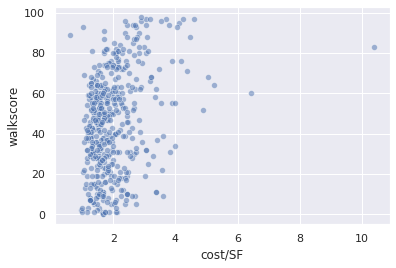

In [7]:
sns.scatterplot(df['cost/SF'], df['walkscore'], alpha=.5);

In [8]:
df['walkscore'] = pd.to_numeric(df['walkscore'])

In [9]:
type(df['walkscore'][0])

numpy.int64

In [10]:
df['walkscore_category'] = ''

def ws_cat(df):
    str_cat = ''
    if df['walkscore'] >= 90: 
        str_cat = "Walker's Paradise"
    elif 90 > df['walkscore'] >= 70: 
        str_cat = "Very Walkable"
    elif 70 > df['walkscore'] >= 50: 
        str_cat = "Somewhat Walkable"
    elif 50 > df['walkscore'] >= 25:
        str_cat = "Car-Dependent_2"
    elif 25 > df['walkscore'] >= 0:
        str_cat = "Car-Dependent_1"
    return str_cat

def ws_cat_num(df):
    num_cat = 0
    if df['walkscore'] >= 90: 
        num_cat = 5
    elif 90 > df['walkscore'] >= 70: 
        num_cat = 4
    elif 70 > df['walkscore'] >= 50: 
        num_cat = 3
    elif 50 > df['walkscore'] >= 25:
        num_cat = 2
    elif 25 > df['walkscore'] >= 0:
        num_cat = 1
    return num_cat

df['walkscore_category'] = df.apply(ws_cat, axis=1)
df['walkscore_category_num'] = df.apply(ws_cat_num, axis=1)

df

,listing_id,property_name,address,mean_rent,mean_area,walkscore,cost/SF,walkscore_category,walkscore_category_num
0,p9c5ygt,Dobie Twenty21 Student Spaces,"2021-2025 Guadalupe St, Austin, TX 78705",1791.500000,434.750000,95,4.120759,Walker's Paradise,5
1,rdsyjd0,The District on La Frontera,"2811 La Frontera Blvd, Austin, TX 78728",2130.714286,926.142857,12,2.300632,Car-Dependent_1,1
2,vsvz28g,Cliffs at Barton Creek,"3050 Tamarron Blvd, Austin, TX 78746",2585.545455,1079.772727,39,2.394527,Car-Dependent_2,2
3,pfzryrs,Radius On Grove,"2301 Grove Blvd, Austin, TX 78741",1604.000000,1042.500000,34,1.538609,Car-Dependent_2,2
4,lb7xscf,Chandelier,"2336 Douglas St, Austin, TX 78741",1274.333333,697.000000,47,1.828312,Car-Dependent_2,2
...,...,...,...,...,...,...,...,...,...
484,h9z6sd3,La Frontera Square Apartments,"2601 La Frontera Blvd, Round Rock, TX 78681",1141.000000,709.866667,53,1.607344,Somewhat Walkable,3
485,l8esygf,300 Bowie St Unit 2904,"Austin, TX 78703",1995.000000,565.000000,96,3.530973,Walker's Paradise,5
486,w4ex40j,617 Peacock Ln,"Austin, TX 78704",2950.000000,1766.000000,60,1.670442,Somewhat Walkable,3
487,6vvhrpr,6500 Adair Dr,"Austin, TX 78754",1650.000000,1636.000000,3,1.008557,Car-Dependent_1,1


In [11]:
df_walkscore = df[['mean_rent', 'mean_area', 'cost/SF', 'walkscore', 'walkscore_category', 'walkscore_category_num']]
df_walkscore = df_walkscore.sort_values(by='walkscore_category')

In [12]:
df_walkscore

,mean_rent,mean_area,cost/SF,walkscore,walkscore_category,walkscore_category_num
244,1603.428571,765.714286,2.094030,1,Car-Dependent_1,1
341,1070.000000,1100.000000,0.972727,2,Car-Dependent_1,1
105,1720.555556,1029.518519,1.671224,0,Car-Dependent_1,1
106,1548.000000,955.500000,1.620094,15,Car-Dependent_1,1
336,1560.586207,1031.103448,1.513511,9,Car-Dependent_1,1
...,...,...,...,...,...,...
52,3725.888889,1284.111111,2.901532,96,Walker's Paradise,5
288,2863.076923,1014.461538,2.822263,90,Walker's Paradise,5
284,2717.500000,853.200000,3.185068,97,Walker's Paradise,5
82,2673.615385,980.692308,2.726253,93,Walker's Paradise,5


In [13]:
ws5_cost_sf = df[df['walkscore_category'] == "Walker's Paradise"]['cost/SF'] 
ws4_cost_sf = df[df['walkscore_category'] == "Very Walkable"]['cost/SF']
ws3_cost_sf = df[df['walkscore_category'] == "Somewhat Walkable"]['cost/SF']
ws2_cost_sf = df[df['walkscore_category'] == "Car-Dependent_2"]['cost/SF']
ws1_cost_sf = df[df['walkscore_category'] == "Car-Dependent_1"]['cost/SF']

In [14]:
# find group means
group_labels = ["Walker's Paradise", "Very Walkable", "Somewhat Walkable", "Car-Dependent_2", "Car-Dependent_1"]
groups_data = [ws5_cost_sf, ws4_cost_sf, ws3_cost_sf, ws2_cost_sf, ws1_cost_sf]
ws_dicts = {}

for label, data in zip(group_labels, groups_data):
    ws_dicts[label] = data
    print('mean for ', label, ': ', np.mean(ws_dicts[label]))

mean for  Walker's Paradise :  3.04572218057239
mean for  Very Walkable :  2.442126047296325
mean for  Somewhat Walkable :  1.9692111311736438
mean for  Car-Dependent_2 :  1.7798758918310666
mean for  Car-Dependent_1 :  1.8165095521053183


In [15]:
# find group sizes
for label, data in ws_dicts.items():
    print('count for ', label, ': ', len(ws_dicts[label]))

count for  Walker's Paradise :  21
count for  Very Walkable :  66
count for  Somewhat Walkable :  134
count for  Car-Dependent_2 :  157
count for  Car-Dependent_1 :  111


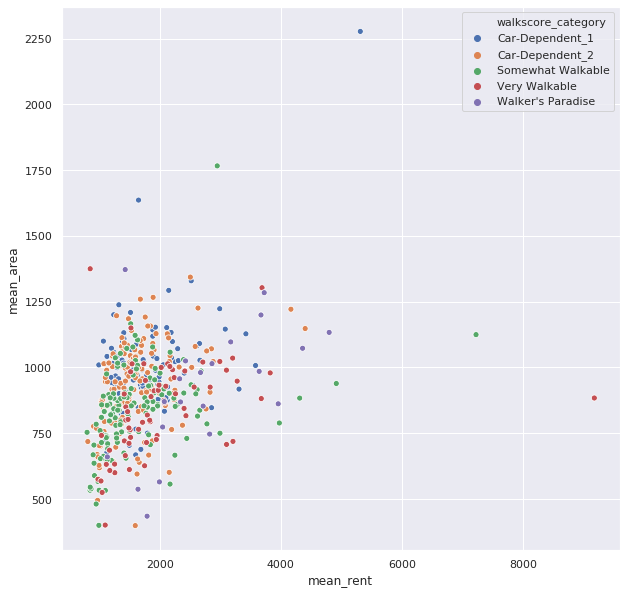

In [22]:
# '3d' scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='mean_rent', y='mean_area', data=df_walkscore, hue='walkscore_category');

In [ ]:
# box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='cost/SF', 
            y='walkscore_category', 
            data=df_walkscore, 
            orient='h', 
            fliersize=3, 
            palette='colorblind', 
            showmeans=True);

In [ ]:
# stats.f_oneway(ws5_cost_sf, ws4_cost_sf, ws3_cost_sf, ws2_cost_sf, ws1_cost_sf)
# stats.f_oneway(ws5_cost_sf, ws4_cost_sf.append([ws3_cost_sf, ws2_cost_sf, ws1_cost_sf]))

stats.f_oneway(ws5_cost_sf.append(ws4_cost_sf), ws3_cost_sf.append([ws2_cost_sf, ws1_cost_sf]))

# stats.f_oneway(ws5_cost_sf.append([ws4_cost_sf, ws3_cost_sf]), ws2_cost_sf.append(ws1_cost_sf))
# stats.f_oneway(ws5_cost_sf.append([ws4_cost_sf, ws3_cost_sf, ws2_cost_sf]), ws1_cost_sf)

In [ ]:
stats.ttest_ind(ws5_cost_sf.append(ws4_cost_sf), ws3_cost_sf.append([ws2_cost_sf, ws1_cost_sf]))

## p-value is much less than the significance level of 5%. We reject the null hypothesis. 